In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]
# change shape of an array
model = LinearRegression() 

model.fit(X,y)
#creating new model of LinearRegression for X and y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

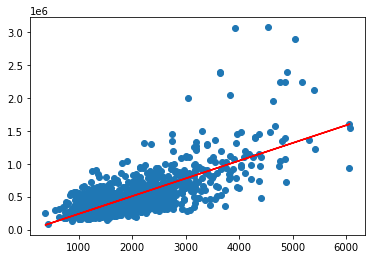

0.496708801663114
Mean squared error equals: 57947526161.288376


In [3]:
#b)

Y = model.predict(X)
plt.scatter(X,y)
# plot of all data
plt.plot(X,Y,color = 'r')
#plot of linear regression model
plt.show()

print(model.score(X,y))
print("Mean squared error equals: "+str(mean_squared_error(y,Y)))

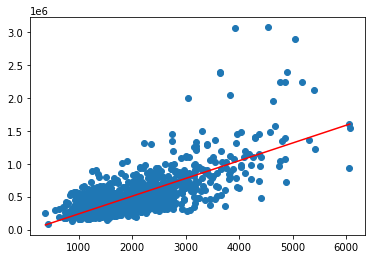

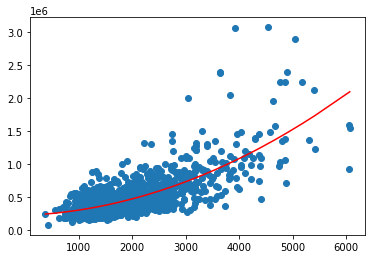

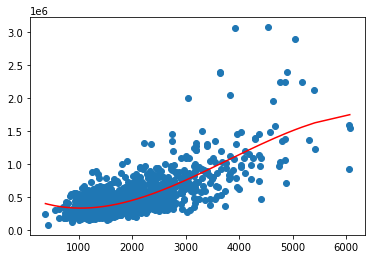

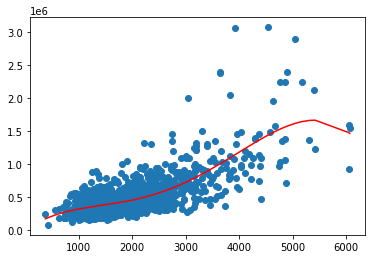

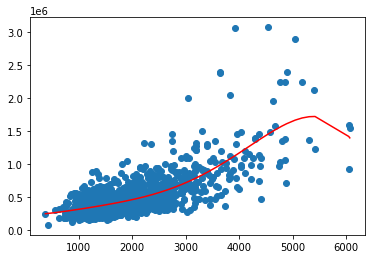

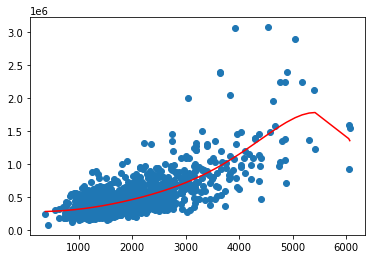

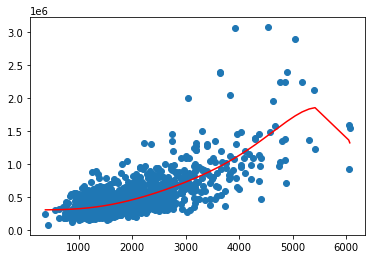

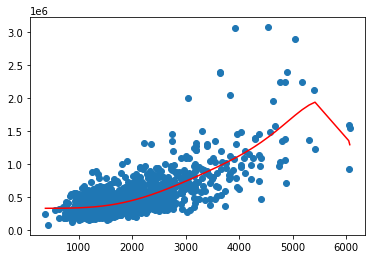

In [5]:
#c)
MSE = []
y = y[X[:,0].argsort()]
X = X[X[:, 0].argsort()]
for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    model.fit(X_order,y)
    plt.plot(X,model.predict(X_order),color='r')
    plt.scatter(X,y)
    plt.show()
    MSE.append(mean_squared_error(y,model.predict(X_order)))
# Based on the data, we create a polynomial function
# We can see dependence between sqft living and price but the biggest houses have lower price

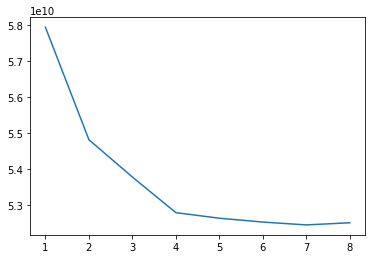

In [6]:
degree = range(1,9)
plt.plot(degree,MSE)
plt.show()
# relation between mean squared error and degree of polynomial
# the higher degree, the smaller mean squared error
# when degree is 8, the curve goes up. It is overfitting

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

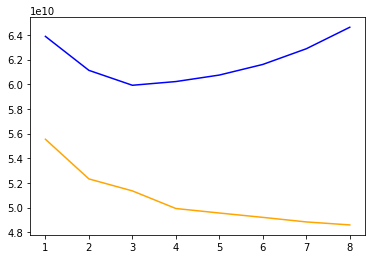

In [7]:
#a)
X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]
MSE_train=[]
MSE_test=[]
for order in range(1,9):
        
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
# split data to train and test
    model.fit(X_train,y_train)
    MSE_train.append(mean_squared_error(y_train,model.predict(X_train)))
    MSE_test.append(mean_squared_error(y_test,model.predict(X_test)))

plt.plot(degree,MSE_train,color = 'orange')
plt.plot(degree,MSE_test, color = 'blue')

plt.show()
# plot shows how the mean squared error changes

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

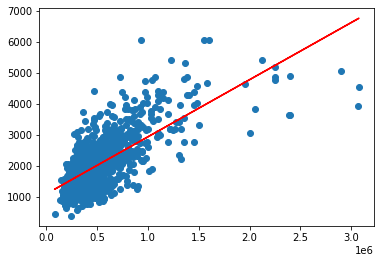

Mean squared error equals: 396407.1889615157


In [8]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model.fit(X,y)

Y = model.predict(X)
plt.scatter(X,y)
plt.plot(X,Y,color = 'r')
plt.show()
print("Mean squared error equals: "+str(mean_squared_error(y,Y)))

In [22]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
X = house_df[['sqft_living', 'bedrooms', 'grade', 'view','condition','sqft_living15']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))
# Model proposed by me is better. Mean squared error is lower. 
# I agree that level and design is important, same as square footage and view.
# I think that amount of bedrooms and bathrooms is also important for buyers
# I think that from sqft_living15 index we can learn a lot about neighborhood. 

Mean squared error equals: 48749267368.97092
Mean squared error equals: 40873429384.996765
